In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

In [3]:
# Read data
data = pd.read_csv('training_dataset.csv')

print(data.head())
print(data.isnull().sum())
print(data.dtypes)
print(data.duplicated().sum())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100323  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095089  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088110  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090291   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092908   73449600
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
0


In [4]:
data = data.drop('Date',axis=1)

correlation = data.corr()
print(correlation["Open"].sort_values(ascending=False))

Open         1.000000
High         0.999945
Low          0.999928
Close        0.999861
Adj Close    0.999494
Volume      -0.189987
Name: Open, dtype: float64


In [5]:
x = data[["High", "Low", "Close","Adj Close"]]
y = data["Open"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.fit_transform(y_test)

In [7]:
# Convert input data to 3D format
x_train_scaled = x_train_scaled.reshape(x_train_scaled.shape[0],x_train_scaled.shape[1], 1)

x_test_scaled = x_test_scaled.reshape(x_test_scaled.shape[0],x_test_scaled.shape[1], 1)

In [73]:
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape= (x_train_scaled.shape[1], 1)))

model.add(LSTM(32, return_sequences=False))

model.add(Dropout(0.3))

model.add(Dense(1))

model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                       │ (None, 4, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_39 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train_scaled,y_train_scaled, epochs=10, batch_size=32, validation_data=(x_test_scaled,y_test_scaled))

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0079 - val_loss: 2.0671e-05
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.7949e-04 - val_loss: 1.4611e-04
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.5174e-04 - val_loss: 1.1088e-04
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.8628e-04 - val_loss: 5.6557e-05
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4.1219e-04 - val_loss: 1.7725e-05
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.7050e-04 - val_loss: 8.2775e-05
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.1359e-04 - val_loss: 1.2353e-05
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 4.0746e-04 - val_loss: 6.9264e-05
Epoch 9/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 4.8564e-04 - val_loss: 2.3167e-05
Epoch 10/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4.5267e-04 - val_loss: 8.0795e-06


In [75]:
prediction_scaled = model.predict(x_test_scaled)

prediction = scaler.inverse_transform(prediction_scaled)

y_test_original = scaler.inverse_transform(y_test_scaled)

mean_absolute = mean_absolute_error(prediction, y_test_original)

mean_squared  = mean_squared_error(prediction, y_test_original)

r2score       = r2_score(prediction, y_test_original)

print('mean_absolute_error:', mean_absolute * 100, '%')
print('mean_squared_error:' , mean_squared * 100, '%')
print('r2_score:'           , r2score * 100, '%')

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
mean_absolute_error: 42.78872776286118 %
mean_squared_error: 26.932843792465466 %
r2_score: 99.97154449134652 %


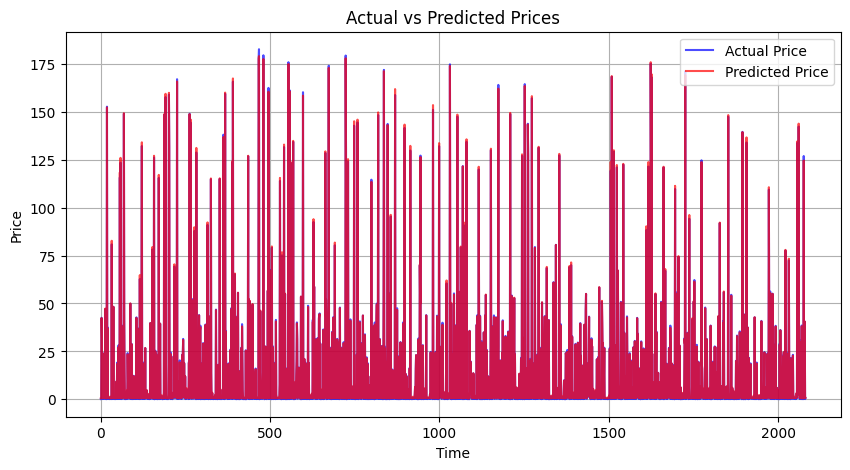

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label="Actual Price", color='blue', alpha=0.7)
plt.plot(prediction, label="Predicted Price", color='red', alpha=0.7)
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [78]:
#Save & Download model

model.save('model.h5')            #Save Model
files.download('model.h5')        #Download Model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
# Prediction Part

new = pd.read_csv('testing_dataset.csv')

new = new.drop('Date',axis=1)

scaler = MinMaxScaler(feature_range=(0,1))

new_scaled = scaler.fit_transform(new)

# Convert input data to 3D format
new_scaled = new_scaled.reshape(new_scaled.shape[0],new_scaled.shape[1], 1)

new_predict = model.predict(new_scaled)
print('new prediction:', new_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
new prediction: [[ 0.7021455 ]
 [ 0.3555075 ]
 [-0.01862617]
 [ 0.08550484]
 [ 0.21614666]
 [ 0.50576717]
 [ 0.749377  ]
 [ 0.96362954]
 [ 1.2128259 ]]
